## Facial attribute detection using CNN

**Team Members**
    1. Sike Ogieva
    2. Lee Mabhena

Dataset is sourced from kaggle accessible at this link: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset?select=list_attr_celeba.csv

In [14]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in the facial attributes dataset
dataset = pd.read_csv("./list_attr_celeba.csv")

In [3]:
# Print the shape of the dataset, have 202599 rows and 41 columns
dataset.shape

(202599, 41)

In [4]:
# Display the first few rows of the DataFrame to get a quick overview
print("First few rows of the dataset:")
print(dataset.head())

# Get a concise summary of the DataFrame, including the number of non-null values in each column
print("\nDataset summary:")
print(dataset.info())

# Display basic statistical details like percentile, mean, std etc. of a data frame's numeric columns
print("\nBasic statistical details:")
print(dataset.describe())

# Check for missing values in each column
print("\nMissing values in each column:")
print(dataset.isnull().sum())

# Display the names of the columns in the DataFrame
print("\nColumn names:")
print(dataset.columns)

First few rows of the dataset:
     image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  000001.jpg                -1                1           1               -1   
1  000002.jpg                -1               -1          -1                1   
2  000003.jpg                -1               -1          -1               -1   
3  000004.jpg                -1               -1           1               -1   
4  000005.jpg                -1                1           1               -1   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Sideburns  Smiling  \
0    -1     -1        -1        -1          -1  ...         -1        1   
1    -1     -1        -1         1          -1  ...         -1        1   
2    -1     -1         1        -1          -1  ...         -1       -1   
3    -1     -1        -1        -1          -1  ...         -1       -1   
4    -1     -1         1        -1          -1  ...         -1       -1   

   Straight_Hair  Wavy_Hair  We

The dataset contains 40 facial attributes. It maps imageId to the image name in the folder of images. There appear to be no null values and 
the dataset uses -1 to represent absense of facial attribute and 1 the presence of facial attribute. The authors of the dataset recommend splitting the dataset in the following way: Images 1-162770 are training, 162771-182637 are validation, 182638-202599 are testing. This is the format we will use in splitting the dataset. The split is 80%, 10%, 10%

In [6]:
# Split the dataset into training, testing and validation
train_data_Y = dataset[:162770]
test_data_Y = dataset[162771:182637]
valid_data_Y = dataset[182638:]

# Verify the split
train_data_Y.shape, test_data_Y.shape, valid_data_Y.shape

((162770, 41), (19866, 41), (19961, 41))

After getting the labels for the images we now preprocess the images.

In [13]:
images_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/Users/leemabhena/Downloads/archive/img_align_celeba",
    color_mode='rgb',
    image_size=(64, 64),
    )

Found 202599 files belonging to 1 classes.


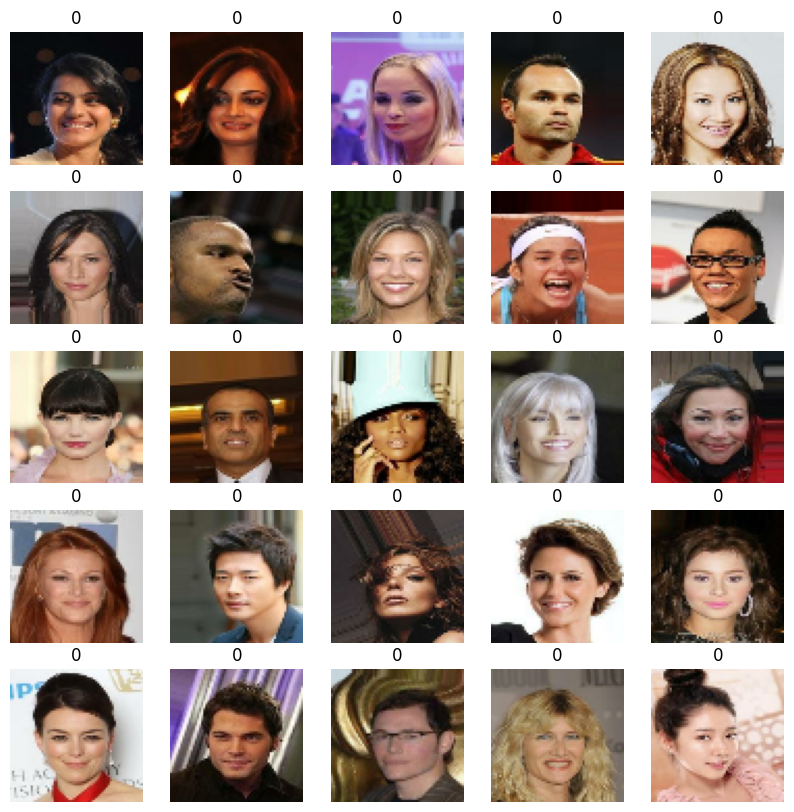

In [15]:
# Visualize the images
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10, 10))
    for n in range(25):
        ax = plt.subplot(5, 5, n + 1)
        plt.imshow(image_batch[n].numpy().astype("uint8"))
        plt.title(label_batch[n].numpy())
        plt.axis("off")

# Take a single batch of images, and their labels
image_batch, label_batch = next(iter(images_data))

# Show the images
show_batch(image_batch, label_batch)

In [18]:
# Normalize the data to be between 0 and 1
from tensorflow.keras import layers 
normalization_layer = layers.Rescaling(1./255)

normalized_data = images_data.map(lambda x, y: (normalization_layer(x), y))